# Elliott Wave Stock

https://en.wikipedia.org/wiki/Ralph_Nelson_Elliott

[*********************100%***********************]  1 of 1 completed


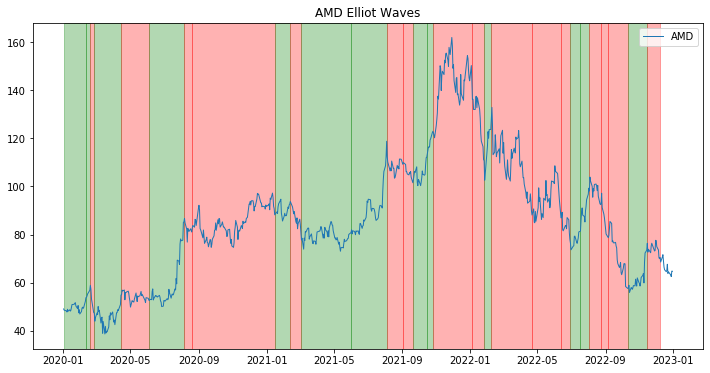

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close']

# Define a simple Elliott Wave function
def elliott_wave(data):
    waves = []
    current_wave = 0
    current_wave_start = data.index[0]
    
    for i in range(1, len(data)):
        if data[i] > data[i - 1]:
            current_wave += 1
        elif data[i] < data[i - 1]:
            current_wave -= 1
        
        if current_wave == 5:  # Completed bullish wave
            waves.append(('Bullish', current_wave_start, data.index[i]))
            current_wave = 0
            current_wave_start = data.index[i]
        elif current_wave == -5:  # Completed bearish wave
            waves.append(('Bearish', current_wave_start, data.index[i]))
            current_wave = 0
            current_wave_start = data.index[i]
    
    return waves

waves = elliott_wave(data)

# Plot the Elliot Waves
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label=symbol, lw=1)
for wave_type, wave_start, wave_end in waves:
    plt.axvspan(wave_start, wave_end, alpha=0.3, color='r' if wave_type == 'Bearish' else 'g')
plt.title(f'{symbol} Elliot Waves')
plt.legend()
plt.show()